# Dataset 

https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset

# Problem definition 

We chose a dataset combining different types of food, world population obesity and undernourished rate, and global covid cases count from around the world.

The idea is to understand how a healthy eating style could help combat the coronavirus, distinguishing the diet patterns from countries with lower COVID infection rate.

Our goal here is to provide diet recommendations based on our findings.

Each dataset provides different diet measure different categories of food, depending on what we want to focus on, so we have

- fat quantity,
- energy intake (kcal),
- food supply quantity (kg),
- protein for different categories of food

To which have been added:

- obesity rate
- undernourished rate
- the most up to date confirmed/deaths/recovered/active cases.

We are going to focus on the fat quantity dataset.

In [66]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import export_graphviz, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC, SVR

Let's start by loading the data

In [67]:
fat_quantity = pd.read_csv("ML3.3_data/Fat_Supply_Quantity_Data.csv")

 ## Data Exploration and Processing

Now let's explore the dataset:
- check the head
- the columns
- the variable types

In [68]:
fat_quantity.sample(10)

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
68,India,0.0,16.0538,7.4859,0.0,5.1196,0.7653,0.3783,0.4046,0.9061,...,21.7804,0.3958,3.8,14.5,0.773256,0.011070,0.751561,0.010625,1.400100e+09,%
32,Congo,0.0,12.9993,0.3390,0.0,2.7016,0.1377,1.8540,0.8370,9.6514,...,26.0091,0.5827,8.4,40.3,0.571675,0.014516,0.379721,0.177437,5.518000e+06,%
27,Central African Republic,0.0,18.5453,2.8767,0.0,2.7645,0.1122,0.5509,0.4998,12.9144,...,19.4838,0.0918,6.3,59.6,0.103292,0.001304,0.101139,0.000849,4.830000e+06,%
47,Eswatini,0.0,20.8055,3.1415,0.0,12.0023,0.4718,0.3682,0.4718,11.1162,...,10.9436,0.1956,13.5,20.6,1.465670,0.054710,1.038859,0.372101,1.104000e+06,%
40,Djibouti,0.0,11.1065,1.3966,0.0,4.3977,0.2494,0.2910,0.1247,5.1210,...,31.4490,0.4572,12.2,18.9,0.601316,0.006377,0.592308,0.002632,9.880000e+05,%
157,Ukraine,0.0,26.9100,5.4940,0.0,3.0837,2.4481,0.5160,0.3084,9.6350,...,17.4638,0.5223,26.1,3.5,3.075923,0.059206,2.653382,0.363335,4.177800e+07,%
8,Austria,0.0,27.8268,12.8517,0.0,1.2297,1.2147,0.4259,0.2249,8.1099,...,17.9323,0.2039,21.9,<2.5,4.739982,0.089679,4.496870,0.153433,8.914000e+06,%
106,Namibia,0.0,16.7373,3.3171,0.0,6.8020,0.2718,0.6075,0.2798,7.7772,...,22.9078,0.1359,15.0,27.3,1.371271,0.014601,1.312830,0.043841,2.541000e+06,%
90,Lithuania,0.0,32.3048,9.3880,0.0,1.7819,1.9226,1.2380,0.3283,14.2134,...,12.7128,0.2579,28.4,<2.5,6.667072,0.104760,4.939621,1.622691,2.794000e+06,%
83,Kuwait,0.0,19.8923,2.1588,0.0,3.0847,2.3242,0.3732,0.3496,9.5706,...,21.2150,0.5055,37.0,2.8,3.624728,0.020550,3.434087,0.170092,4.691000e+06,%


In [69]:
fat_quantity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Miscellaneous                 170 non-null    float64
 11  Milk - Excluding Butter       170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

Let's create a function to **check missing data** and unveil **the percentage of data missing** for each dataframe

In [70]:
#Drop columns with less than 25% of non null values

n_lines = fat_quantity.shape[0]
#fat_quantity = fat_quantity.dropna(axis=1,thresh=n_lines/4)#how="all") 

#Drop lines without non null


Delete the countries for which values are missing.

In [71]:
fat_quantity =fat_quantity.dropna(how="any", axis=0)

fat_quantity.info()

fat_quantity.drop(columns='Country', axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       154 non-null    object 
 1   Alcoholic Beverages           154 non-null    float64
 2   Animal Products               154 non-null    float64
 3   Animal fats                   154 non-null    float64
 4   Aquatic Products, Other       154 non-null    float64
 5   Cereals - Excluding Beer      154 non-null    float64
 6   Eggs                          154 non-null    float64
 7   Fish, Seafood                 154 non-null    float64
 8   Fruits - Excluding Wine       154 non-null    float64
 9   Meat                          154 non-null    float64
 10  Miscellaneous                 154 non-null    float64
 11  Milk - Excluding Butter       154 non-null    float64
 12  Offals                        154 non-null    float64
 13  Oilcr

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,0.0000,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,0.0163,...,17.0831,0.3593,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,0.0000,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,0.0170,...,9.2443,0.6503,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,0.0000,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,0.0439,...,27.3606,0.5145,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,0.0000,15.3041,1.3130,0.0,6.5545,0.1539,1.4155,0.3488,11.0268,0.0308,...,22.4638,0.1231,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
5,0.0000,30.3572,3.3076,0.0,1.3316,1.5706,0.1664,0.2091,19.2693,0.0000,...,17.3147,0.1878,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0000,16.3261,2.2673,0.0,2.5449,0.6555,0.5707,0.9640,7.0949,0.0077,...,29.5211,0.1851,25.2,21.2,0.452585,0.004287,0.424399,0.023899,28645000.0,%
166,0.0000,33.2484,3.8238,0.0,3.7155,0.7839,1.1217,0.4079,26.4292,0.0064,...,5.6211,0.6373,2.1,9.3,0.002063,0.000036,0.001526,0.000501,96209000.0,%
167,0.0000,12.5401,2.0131,0.0,11.5271,0.5514,0.3847,0.2564,8.0010,0.0256,...,23.6312,0.1667,14.1,38.9,0.007131,0.002062,0.004788,0.000282,29826000.0,%
168,0.0783,9.6005,1.6113,0.0,14.3225,0.6266,1.0070,0.1343,4.9010,0.0224,...,15.2848,0.1567,6.5,46.7,0.334133,0.004564,0.290524,0.039045,18384000.0,%


Look at the different data types for each variable.

In [72]:
cat_names = fat_quantity.select_dtypes(include='object').columns
num_names = fat_quantity.select_dtypes(exclude='object').columns

print(cat_names)
print(num_names)



Index(['Country', 'Undernourished', 'Unit (all except Population)'], dtype='object')
Index(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Miscellaneous',
       'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy Roots', 'Stimulants', 'Sugar Crops', 'Sugar & Sweeteners',
       'Treenuts', 'Vegetal Products', 'Vegetable Oils', 'Vegetables',
       'Obesity', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population'],
      dtype='object')


Explore the variables that are not of float type and see of you can convert them in to float type.

In [73]:
#below
df_dum = pd.get_dummies(fat_quantity[cat_names], dtype=float)

# Remove the original and concate the news
fat_quantity = pd.concat([fat_quantity.drop(columns=cat_names), df_dum],axis=1)

cat_names = df_dum.columns


# Clustering

## Data preparation

Scale the dataset

In [74]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

scaler = StandardScaler()
fat_quantity_scaled = scaler.fit(fat_quantity)


def fit_model(estimator, X):

    # Pipelines
    #num_pipeline = Pipeline([
    #    ('imputer', SimpleImputer(strategy="median")),
    #    ('scaler', StandardScaler())
    #])

    #cat_pipeline = Pipeline([
    #    ('imputer', SimpleImputer(strategy="most_frequent")),
       # ('encoder', OneHotEncoder(handle_unknown='ignore'))
    #])

    #transform_pipeline = ColumnTransformer([
    #    ("num", num_pipeline, num_names),
    #    ("cat", cat_pipeline, cat_names)
    #])

    # full pipeline
    model_pipeline = Pipeline([
        ("processor", StandardScaler()),
        ("model", estimator)
    ])
    model = model_pipeline.fit(X)
    return model

    


## Plot some data

Now, we want to visualize some variables for each state. To do so, we use plotly express to have the possibility to hover on a scatter plot and see the statistics per country clearer as explained here.

https://plotly.com/python/hover-text-and-formatting/#:~:text=Basic%20Charts%20tutorials.-,Hover%20Labels,having%20a%20hover%20label%20appear.

Plot the "Obesity" vs "Deaths" statistics

Text(0.5, 0, 'Obesity')

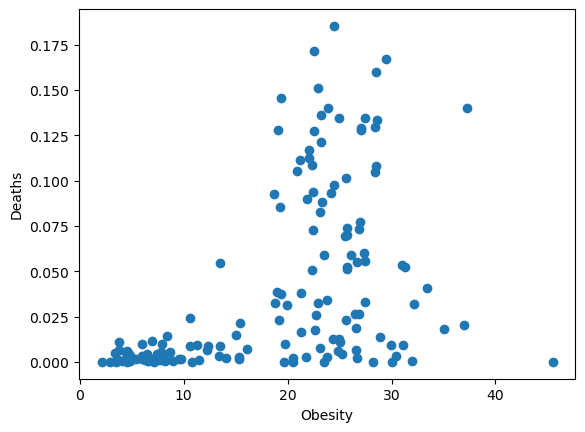

In [75]:
plt.scatter(fat_quantity['Obesity'],fat_quantity['Deaths'])
plt.ylabel('Deaths')
plt.xlabel('Obesity')

Plot the "Animal fats" vs "Deaths" statistics

Text(0.5, 0, 'Animal fats')

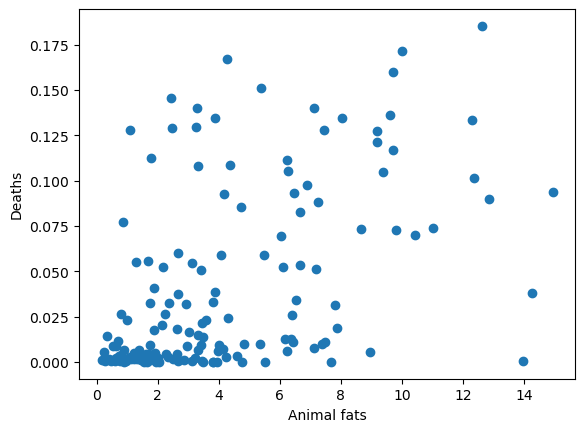

In [76]:
plt.scatter(fat_quantity['Animal fats'],fat_quantity['Deaths'])
plt.ylabel('Deaths')
plt.xlabel('Animal fats')

## K-means and Elbow method

We start with the K-Means model:
- use the scikit-learn method
- use the method you implemented.

Use a graphical tool, the elbow method, to estimate the optimal number of clusters k for a given task.
- Determine the optimal number of clusters for the previous 2 plots.

In [84]:
from sklearn.cluster import KMeans
from modulekmeans import Kmeans
from sklearn.decomposition import PCA


X = fat_quantity 



#Sklearn
skl_kmeans = KMeans(n_clusters=5, random_state=42)
#skl_kmeans = fit_model(skl_kmeans,X)
skl_kmeans.fit(X)
skl_labels = skl_kmeans.labels_
skl_centroids = skl_kmeans.cluster_centers_

#my code

X_array = X.to_numpy()
my_kmeans = Kmeans(K=5, random_state=42)
#my_kmeans = fit_model(my_kmeans, X_array)
my_kmeans.fit(X_array)
my_labels= my_kmeans.labels
my_centroids = my_kmeans.centroids



 stop in the iteration 17


Plot the obtained clusters

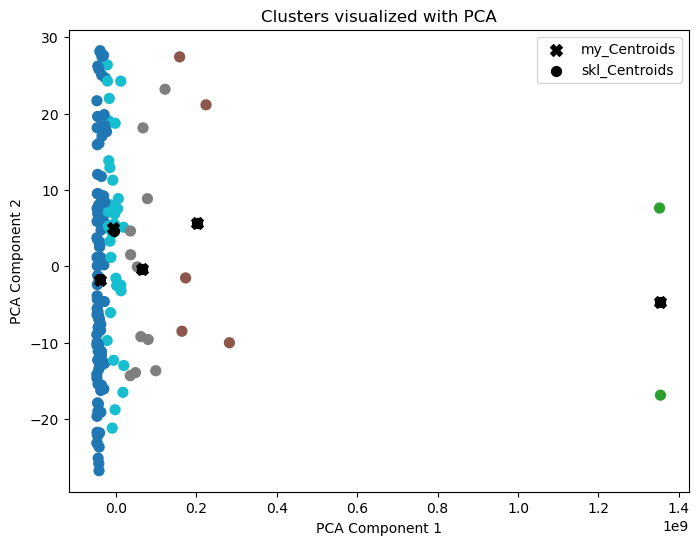

In [87]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
my_centroids_pca = pca.transform(my_centroids)
skl_centroids_pca = pca.transform(skl_centroids)

# Plotando os clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],c=skl_labels, cmap='tab10' , s=50)
plt.scatter(my_centroids_pca[:,0], my_centroids_pca[:,1], c='black', s=70, marker='X', label='my_Centroids')
plt.scatter(skl_centroids_pca[:,0], skl_centroids_pca[:,1], c='black', s=50, marker='o', label='skl_Centroids')

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters visualized with PCA")
plt.legend()
#plt.colorbar(label='Cluster')
plt.show()


## Other clustering methods

We are going to explore other clustering methods, such as Mean-Shift.

You can read more about it in the next ressource:
https://scikit-learn.org/stable/modules/clustering.html


Apply the method to our datasets made of 2 variables ("Obesity" vs "Deaths")

In [79]:
# Mean-Shift
from sklearn.cluster import MeanShift, estimate_bandwidth


Plot the obtained clusters

Check out other algorithms such as DBSAN or OPTICS, why are these algorithms very interesting and in what cases? 

In [80]:
from sklearn.cluster import DBSCAN


# Regression and prediction

Given this dataset and the emphasis we have already laid on deaths through clustering, it would be interesting to study this dataset for a classification purpose and see how accurately we can predict the mortality rate in fonction of the given features.

## Creating train and test sets 

Let's separate the data into a training and testing sets using random selection.

Now drop the labels from the training set and create a new variable for the labels.

Scale the datasets.

## Random Forest

Let's try a random forest model on the prepared fat_quantity training set.

Now we predict.

Let's perform a 10 fold cross validation.
And display the resulting scores:

## Learning Curves analysis 

Use the function seen in **Module 1 to plot learning curves with cross validation.** 

In [81]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    pass

Try to interpret the obtained learning curve.

Perform a grid search to try to obtain the best hyperparameters. What is the best score that you obtained?

## SVM

Use the SVM regressor to estimate the death rate. See if you can get a better model than with the Random forest regressor.

## Linear regression

# Dimensionality reduction

Let's take a look at the whole dataset and see if there are any clusters.

In order to do these perform and plot a PCA of 2 components.

Dimensionality reduction is a way to reduce the number of features in your dataset without having to lose much information and keep the model’s performance. Check out the Random Forest based method and PCA for dimensionality reduction in the following ressource:

https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

## Random Forest feature selection

Plot the feature importance graph.

Comment the graph.

## PCA dimensionality reduction

PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. Apply clustering methods on this new set of variables. Are the clusters obtained different than the clusters obtained on the "Obesity" vs "Deaths"?

Apply the Elbow method to determne the right number of clusters.

Use diverse methods to cluster the countries.